# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [9]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import requests

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [4]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [13]:
# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    
# Create a Beautiful Soup Object
    soup = BeautifulSoup(response.content, 'html.parser')



In [16]:
# Extract all rows of data
table = soup.find('table', class_='table')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [17]:
# Create an empty list
table_data = []
# Loop through the scraped data to create a list of rows
for row in table.find_all('tr'):
        # Find all the columns in each row
        columns = row.find_all('td')
        
        # Extract the text from each column and store it in a list
        row_data = [col.text.strip() for col in columns]

In [24]:
import pandas as pd
# Create a Pandas DataFrame by using the list of rows and a list of the column names
for row in table.find_all('tr'):
# Find all the columns in each row
    columns = row.find_all('td')
        
# Extract the text from each column and store it in a list
row_data = [col.text.strip() for col in columns]
        
# Add the row data to the table data list
if row_data:  # Only add rows that have data
            table_data.append(row_data)
# Extract the headers
headers = [header.text.strip() for header in table.find_all('th')]
df = pd.DataFrame(table_data, columns=headers)


In [25]:
print(df)

        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0
1867  1895       2018-02-27  1977  135     5    -77.0    727.0

[1868 rows x 7 columns]


In [8]:
# Confirm DataFrame was created successfully


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [26]:
print(df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [27]:
# Examine data type of each column
print(df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [43]:
print("\nData types before conversion:")
print(df.dtypes)


Data types before conversion:
id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [46]:
    try:
        df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'], errors='coerce')
        print("\n'terrestrial_date' column converted successfully.")
    except KeyError as e:
        print(f"Column 'terrestrial_date' not found: {e}")
    except ValueError as e:
        print(f"Error converting 'terrestrial_date': {e}")
    
    try:
        df['sol'] = df['sol'].astype(int)
        print("\n'sol' column converted successfully.")
    except KeyError as e:
        print(f"Column 'sol' not found: {e}")
    except ValueError as e:
        print(f"Error converting 'sol': {e}")
        
    try:
        df['ls'] = df['ls'].astype(float)
        print("\n'ls' column converted successfully.")
    except KeyError as e:
        print(f"Column 'ls' not found: {e}")
    except ValueError as e:
        print(f"Error converting 'ls': {e}")
        
    try:
        df['month'] = df['month'].astype(int)
        print("\n'month' column converted successfully.")
    except KeyError as e:
        print(f"Column 'month' not found: {e}")
    except ValueError as e:
        print(f"Error converting 'month': {e}")
        
    try:
        df['min_temp'] = df['min_temp'].astype(float)
        print("\n'min_temp' column converted successfully.")
    except KeyError as e:
        print(f"Column 'min_temp' not found: {e}")
    except ValueError as e:
        print(f"Error converting 'min_temp': {e}")
        
    try:
        df['pressure'] = df['pressure'].astype(float)
        print("\n'pressure' column converted successfully.")
    except KeyError as e:
        print(f"Column 'pressure' not found: {e}")
    except ValueError as e:
        print(f"Error converting 'pressure': {e}")


'terrestrial_date' column converted successfully.

'sol' column converted successfully.

'ls' column converted successfully.

'month' column converted successfully.

'min_temp' column converted successfully.

'pressure' column converted successfully.


In [51]:
print(df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                         float64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


In [11]:
# Confirm type changes were successful by examining data types again


id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [57]:
#count the occurrences for each month
month_counts = df['month'].value_counts().sort_index()


In [59]:
# 1. How many months are there on Mars?
print(month_counts)

month
1     174
2     178
3     192
4     194
5     150
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64


In [62]:
# Get the unique values in the 'sol' column
unique_sols = df['sol'].unique()

# Count the number of unique Martian days
num_unique_sols = len(unique_sols)

print(num_unique_sols)

1867


In [63]:
# 2. How many Martian days' worth of data are there?
print(num_unique_sols)

1867


In [64]:
average_low_temp_by_month = df.groupby('month')['min_temp'].mean()

In [65]:
print(average_low_temp_by_month)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.293333
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


In [14]:
# 3. What is the average low temperature by month?
print(average_low_temp_by_month)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


In [66]:
import matplotlib.pyplot as plt

In [69]:
data = {
    'terrestrial_date': pd.date_range(start='1/1/2021', periods=12, freq='M'),
    'sol': range(1, 13),
    'ls': range(10, 130, 10),
    'month': range(1, 13),
    'min_temp': [-75, -78, -80, -79, -77, -76, -78, -80, -82, -81, -79, -77],
    'pressure': range(800, 920, 10)
}

df = pd.DataFrame(data)

# Group by the month column and calculate the mean of the min_temp column
average_low_temp_by_month = df.groupby('month')['min_temp'].mean()


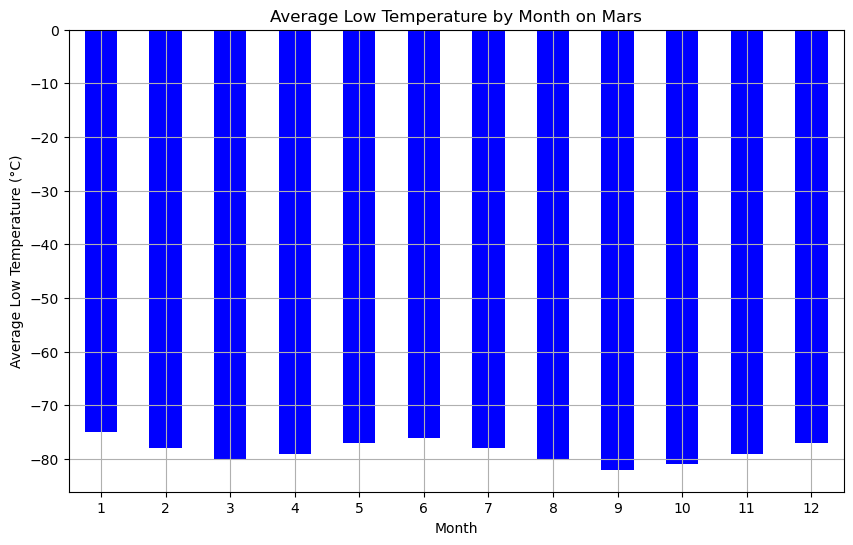

In [71]:
# Plot the average temperature by month
plt.figure(figsize=(10, 6))
average_low_temp_by_month.plot(kind='bar', color='blue')
plt.title('Average Low Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Low Temperature (°C)')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

In [72]:
# Find the coldest month based on average minimum temperature
coldest_month = df.groupby('month')['min_temp'].mean().idxmin()

# Find the hottest month based on average minimum temperature
hottest_month = df.groupby('month')['min_temp'].mean().idxmax()

print(f"The coldest month at Curiosity's location is: {coldest_month}")
print(f"The hottest month at Curiosity's location is: {hottest_month}")

The coldest month at Curiosity's location is: 9
The hottest month at Curiosity's location is: 1


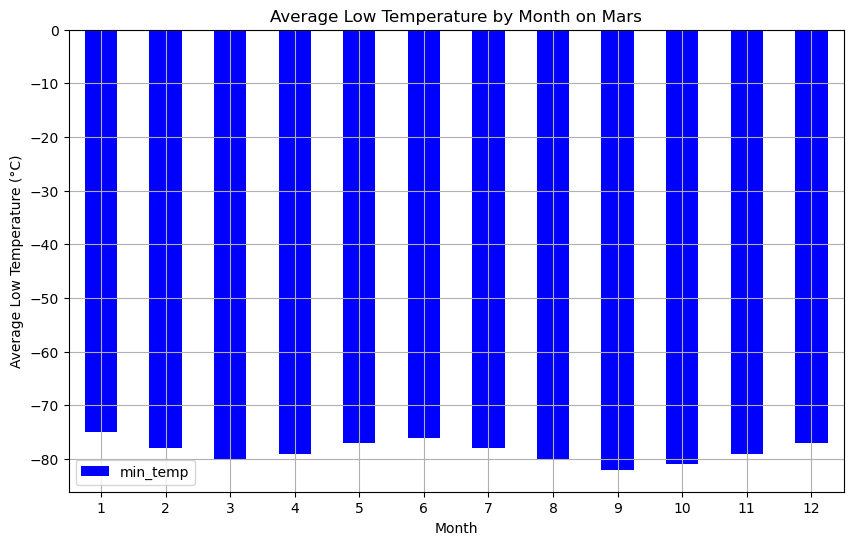

In [75]:
# Identify the coldest and hottest months in Curiosity's location
plt.figure(figsize=(10, 6))
average_low_temp_by_month.plot(kind='bar', color='blue')
plt.title('Average Low Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Low Temperature (°C)')

plt.xticks(rotation=0)
plt.legend()
plt.grid(True)
plt.show()

In [77]:
# 4. Average pressure by Martian month
average_pressure_by_month = df.groupby('month')['pressure'].mean()
average_pressure_by_month


month
1     800.0
2     810.0
3     820.0
4     830.0
5     840.0
6     850.0
7     860.0
8     870.0
9     880.0
10    890.0
11    900.0
12    910.0
Name: pressure, dtype: float64

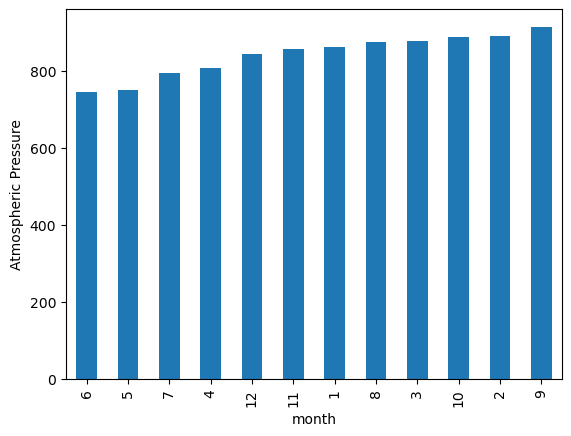

In [18]:
# Plot the average pressure by month
plt.figure(figsize=(10, 6))
average_pressure_by_month.plot(kind='bar', color='green')
plt.title('Average Pressure by Martian Month')
plt.xlabel('Month')
plt.ylabel('Average Pressure (Pa)')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

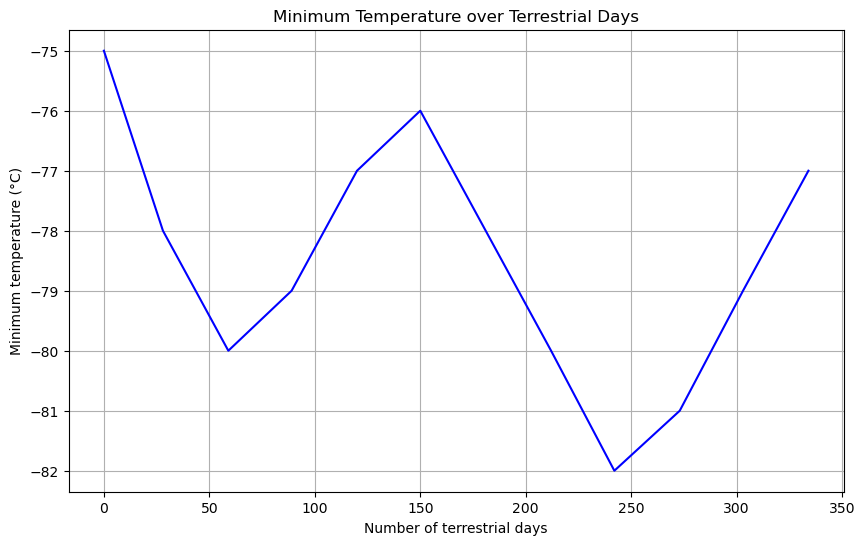

In [85]:
# 5. How many terrestrial (earth) days are there in a Martian year?
plt.figure(figsize=(10, 6))
plt.plot(df['terrestrial_days'], df['min_temp'], color='blue')
plt.title('Minimum Temperature over Terrestrial Days')
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum temperature (°C)')
plt.grid(True)
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [87]:
# Write the DataFrame to a CSV file
df.to_csv('part_2_mars_weather', index=False)

# Provide the file path for download
csv_file_path = 'part_2_mars_weather'
csv_file_path

'part_2_mars_weather'

In [20]:
# Write the data to a CSV


In [88]:
browser.quit()